## AI & Machine Learning for Data Quality
**Description**: AI and machine learning can automate and enhance data quality checks by learning patterns and identifying anomalies more effectively than static rules.

**Task 1**: Training a model to predict and flag unusual trend patterns in sales data that
deviate from historical norms.

In [ ]:
# write your code from here

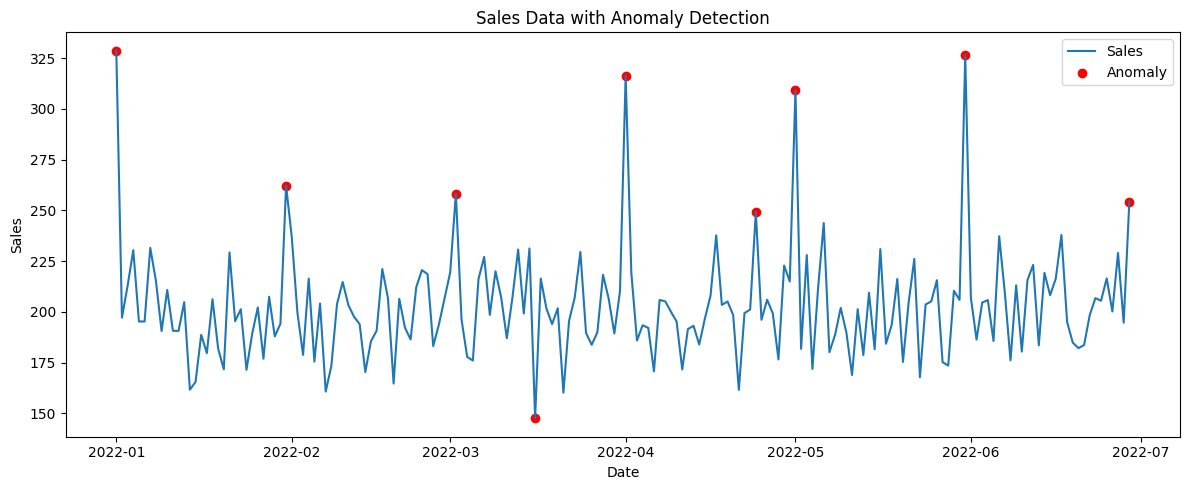

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Create mock sales data (time series)
np.random.seed(42)
dates = pd.date_range(start='2022-01-01', periods=180)
sales = np.random.normal(loc=200, scale=20, size=len(dates))
# Inject anomalies
sales[::30] += np.random.normal(100, 30, 6)

df_sales = pd.DataFrame({'date': dates, 'sales': sales})

# Isolation Forest to detect anomalies
model = IsolationForest(contamination=0.05, random_state=42)
df_sales['anomaly'] = model.fit_predict(df_sales[['sales']])
df_sales['is_anomaly'] = df_sales['anomaly'] == -1

# Plot
plt.figure(figsize=(12, 5))
plt.plot(df_sales['date'], df_sales['sales'], label='Sales')
plt.scatter(df_sales[df_sales['is_anomaly']]['date'], df_sales[df_sales['is_anomaly']]['sales'],
            color='red', label='Anomaly')
plt.title("Sales Data with Anomaly Detection")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.tight_layout()
plt.show()


**Task 2**: Using clustering algorithms to detect duplicate records where entries are not
exactly identical.

In [ ]:
# write your code from here

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

# Sample mock data with slight variations in similar names
data = pd.DataFrame({
    'name': ['Jon Doe', 'John Doe', 'J. Doe', 'Jane Smith', 'Janet Smith', 'J. Smith', 'Alice Brown', 'Alicia Brown'],
    'email': ['jon@example.com', 'john@example.com', 'jd@example.com',
              'jane@example.com', 'janet@example.com', 'js@example.com',
              'aliceb@example.com', 'alicia@example.com']
})

# Basic preprocessing: convert text to numeric vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
name_vectors = tfidf.fit_transform(data['name'])

# Cluster the name vectors
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(name_vectors)
data['cluster'] = clusters

# Print potential duplicate clusters
print("Potential Duplicate Groups:")
for c in data['cluster'].unique():
    print(f"\nCluster {c}:\n", data[data['cluster'] == c])


Potential Duplicate Groups:

Cluster 0:
            name               email  cluster
0       Jon Doe     jon@example.com        0
2        J. Doe      jd@example.com        0
6   Alice Brown  aliceb@example.com        0
7  Alicia Brown  alicia@example.com        0

Cluster 2:
        name             email  cluster
1  John Doe  john@example.com        2

Cluster 1:
           name              email  cluster
3   Jane Smith   jane@example.com        1
4  Janet Smith  janet@example.com        1
5     J. Smith     js@example.com        1


**Task 3**: Implementing classification models to validate data based on learned
characteristics from labeled datasets.

In [ ]:
# write your code from here



Confusion Matrix:
 [[59 16]
 [14 11]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        75
           1       0.41      0.44      0.42        25

    accuracy                           0.70       100
   macro avg       0.61      0.61      0.61       100
weighted avg       0.71      0.70      0.70       100



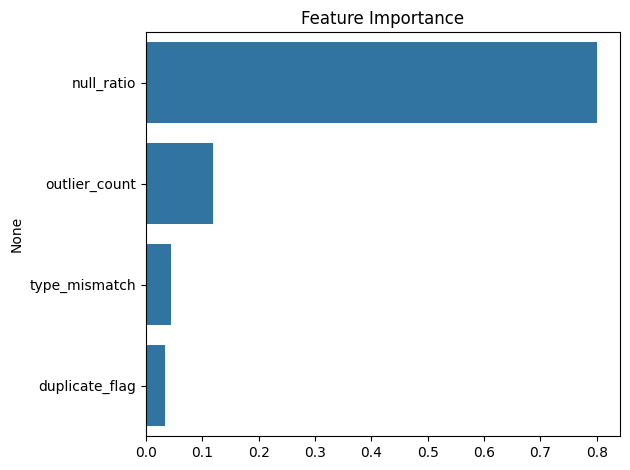

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Create mock labeled data with features
df = pd.DataFrame({
    'null_ratio': np.random.uniform(0, 1, 500),
    'outlier_count': np.random.randint(0, 5, 500),
    'type_mismatch': np.random.randint(0, 2, 500),
    'duplicate_flag': np.random.randint(0, 2, 500),
    'label': np.random.choice([0, 1], 500, p=[0.7, 0.3])  # 0: valid, 1: invalid
})

# Split and train
X = df.drop('label', axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Feature importance plot
import seaborn as sns
sns.barplot(x=clf.feature_importances_, y=X.columns)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()
